In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#### Load the dataset into Python and identify the type of the dataset features and report them. 

In [2]:
#loading the given datasets:
df1=pd.read_csv('ota_train_small.csv',parse_dates=[1])
df1

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380552,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,117267,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2380553,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,125075,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2380554,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,127402,5,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2380555,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,128251,3,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [3]:
#Shape of the data 
df1.shape

(2380557, 54)

In [4]:
#First ten rows of the data
df1.head(10)

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
5,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,39993,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
6,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,46162,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
7,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,49152,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,56063,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,56472,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [5]:
#Information regarding our data:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   search_id                       int64         
 1   timestamp                       datetime64[ns]
 2   site_id                         int64         
 3   user_country_id                 int64         
 4   user_hist_stars                 float64       
 5   user_hist_paid                  float64       
 6   listing_country_id              int64         
 7   listing_id                      int64         
 8   listing_stars                   int64         
 9   listing_review_score            float64       
 10  is_brand                        int64         
 11  location_score1                 float64       
 12  location_score2                 float64       
 13  log_historical_price            float64       
 14  listing_position                int64         
 15

In [6]:
df1.describe()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
count,2.380557e+06,2.380557e+06,2.380557e+06,122780.000000,123494.000000,2.380557e+06,2.380557e+06,2.380557e+06,2.377071e+06,2.380557e+06,...,47961.000000,154468.000000,174850.000000,67832.000000,913495.000000,947465.000000,292700.000000,2.380557e+06,66388.000000,2.380557e+06
mean,3.337016e+05,9.970224e+00,1.754588e+02,3.382814,178.094940,1.739159e+02,7.008190e+04,3.180607e+00,3.779416e+00,6.346880e-01,...,17.196243,0.147856,0.083180,20.109919,-0.060010,0.009595,21.731093,4.456688e-02,383.229069,2.788759e-02
std,1.923719e+05,7.667827e+00,6.585934e+01,0.694562,108.568025,6.832483e+01,4.060398e+04,1.052086e+00,1.049727e+00,4.815176e-01,...,29.536009,0.579293,0.317575,63.110961,0.469455,0.203876,800.608005,2.063509e-01,527.019882,1.646508e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,1.500000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.674260e+05,5.000000e+00,1.000000e+02,2.950000,111.090000,1.000000e+02,3.502800e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000e+00,124.150000,0.000000e+00
50%,3.332720e+05,5.000000e+00,2.190000e+02,3.450000,152.620000,2.190000e+02,6.961500e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000,0.000000e+00,219.185000,0.000000e+00
75%,5.007050e+05,1.400000e+01,2.190000e+02,3.950000,215.950000,2.190000e+02,1.051420e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000,0.000000,17.000000,0.000000e+00,432.125000,0.000000e+00
max,6.655730e+05,3.400000e+01,2.310000e+02,5.000000,1507.120000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1363.000000,1.000000,1.000000,7951.000000,1.000000,1.000000,130000.000000,1.000000e+00,20238.720000,1.000000e+00


In [7]:
df1.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

In [8]:
df1.isnull().mean()

search_id                         0.000000
timestamp                         0.000000
site_id                           0.000000
user_country_id                   0.000000
user_hist_stars                   0.948424
user_hist_paid                    0.948124
listing_country_id                0.000000
listing_id                        0.000000
listing_stars                     0.000000
listing_review_score              0.001464
is_brand                          0.000000
location_score1                   0.000000
location_score2                   0.220953
log_historical_price              0.000000
listing_position                  0.000000
price_usd                         0.000000
has_promotion                     0.000000
destination_id                    0.000000
length_of_stay                    0.000000
booking_window                    0.000000
num_adults                        0.000000
num_kids                          0.000000
num_rooms                         0.000000
stay_on_sat

In [9]:
df1.columns[df1.isnull().mean() < 0.8]

Index(['search_id', 'timestamp', 'site_id', 'user_country_id',
       'listing_country_id', 'listing_id', 'listing_stars',
       'listing_review_score', 'is_brand', 'location_score1',
       'location_score2', 'log_historical_price', 'listing_position',
       'price_usd', 'has_promotion', 'destination_id', 'length_of_stay',
       'booking_window', 'num_adults', 'num_kids', 'num_rooms',
       'stay_on_saturday', 'distance_to_dest', 'random_sort',
       'competitor2_rate', 'competitor2_has_availability', 'competitor3_rate',
       'competitor3_has_availability', 'competitor5_rate',
       'competitor5_has_availability', 'competitor8_rate',
       'competitor8_has_availability', 'clicked', 'booked'],
      dtype='object')

In [10]:
df=df1[df1.columns[df1.isnull().mean() < 0.8]]

In [11]:
df

,search_id,timestamp,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,...,competitor2_rate,competitor2_has_availability,competitor3_rate,competitor3_has_availability,competitor5_rate,competitor5_has_availability,competitor8_rate,competitor8_has_availability,clicked,booked
0,4,2012-12-31 08:59:22,5,219,219,3625,4,4.0,0,3.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,4,2012-12-31 08:59:22,5,219,219,11622,4,4.0,0,2.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,4,2012-12-31 08:59:22,5,219,219,11826,5,4.5,1,3.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,4,2012-12-31 08:59:22,5,219,219,22824,3,4.0,0,3.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,4,2012-12-31 08:59:22,5,219,219,37581,5,4.5,0,3.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380552,665573,2013-03-30 16:39:40,5,219,219,117267,4,4.5,1,2.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2380553,665573,2013-03-30 16:39:40,5,219,219,125075,4,4.5,1,3.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2380554,665573,2013-03-30 16:39:40,5,219,219,127402,5,4.5,1,2.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2380555,665573,2013-03-30 16:39:40,5,219,219,128251,3,4.0,1,3.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


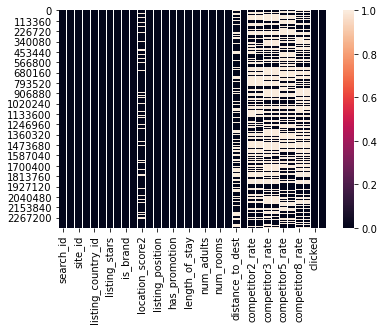

In [12]:
sns.heatmap(df.isnull())

In [13]:
corr_matrix = df.corr()
print(corr_matrix["clicked"].sort_values(ascending=False))

clicked                         1.000000
booked                          0.784226
location_score2                 0.073718
has_promotion                   0.040241
listing_stars                   0.031012
listing_review_score            0.024103
competitor8_rate                0.023790
competitor5_rate                0.021439
competitor3_rate                0.017206
competitor2_rate                0.017189
site_id                         0.008371
num_rooms                       0.007526
num_kids                        0.006132
random_sort                     0.005218
num_adults                      0.004768
log_historical_price            0.003157
competitor8_has_availability    0.002484
location_score1                 0.002346
length_of_stay                  0.002308
distance_to_dest                0.002219
stay_on_saturday                0.001820
booking_window                  0.001457
is_brand                        0.001456
destination_id                  0.000969
price_usd       

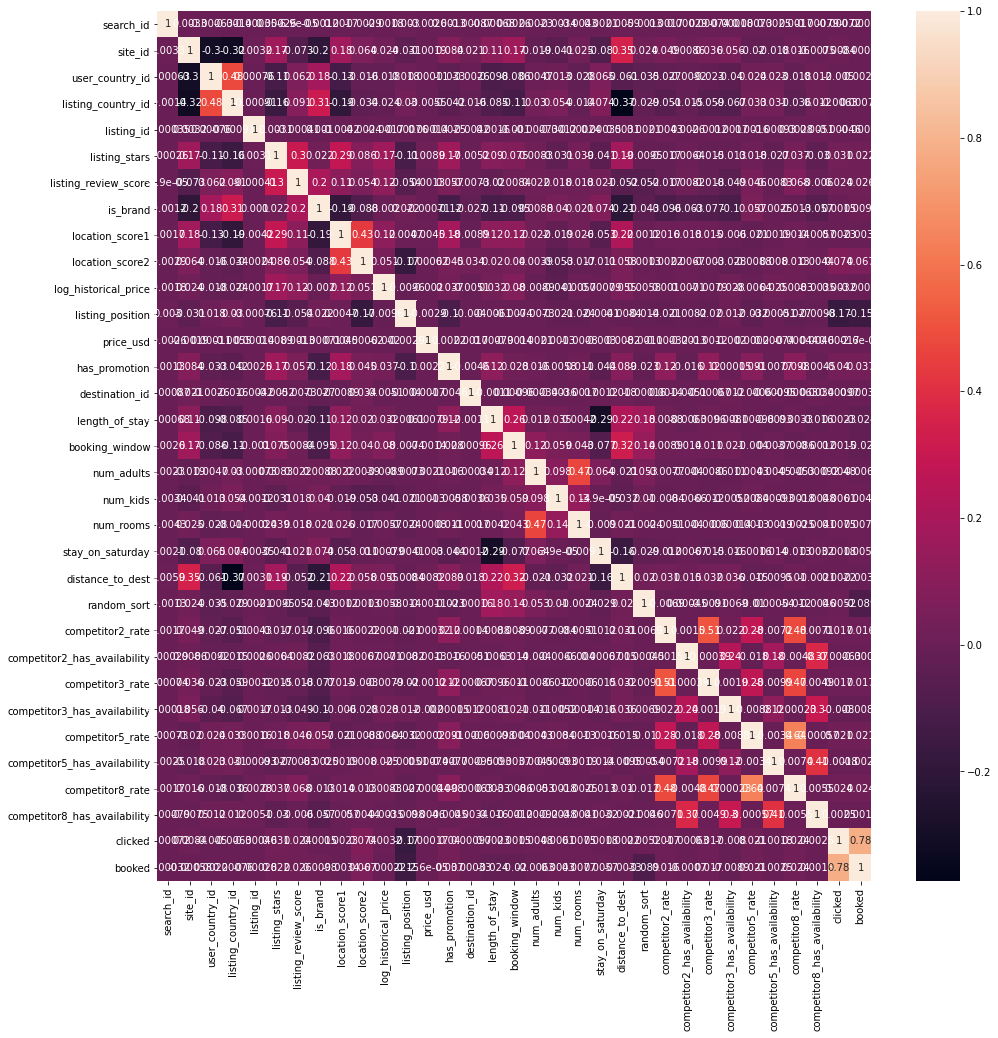

In [14]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [15]:
corr_matrix = df.corr()
print(corr_matrix["booked"].sort_values(ascending=False))

booked                          1.000000
clicked                         0.784226
location_score2                 0.066700
has_promotion                   0.036804
listing_review_score            0.025697
competitor8_rate                0.024254
listing_stars                   0.022089
competitor5_rate                0.020527
competitor3_rate                0.016599
competitor2_rate                0.016101
is_brand                        0.009751
num_rooms                       0.007721
stay_on_saturday                0.005705
num_kids                        0.004267
user_country_id                 0.002178
competitor8_has_availability    0.001534
listing_country_id              0.000763
destination_id                  0.000327
price_usd                      -0.000026
log_historical_price           -0.000224
listing_id                     -0.000282
search_id                      -0.000324
site_id                        -0.000576
competitor2_has_availability   -0.000700
competitor5_has_

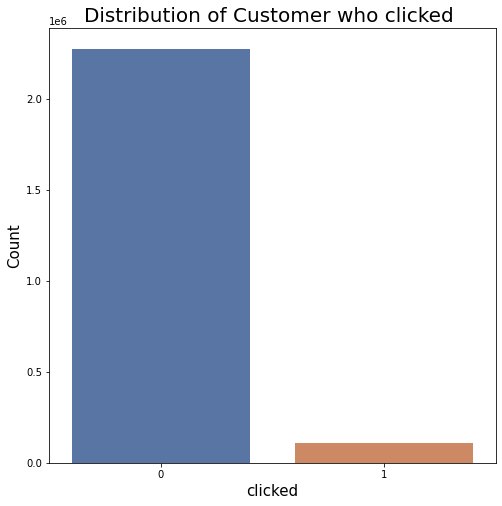

In [16]:
#Data distribution of the Target Variable before removing outliers:
plt.figure(figsize=(8,8))
sns.countplot(x = df.clicked,palette='deep')
plt.xlabel('clicked', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Customer who clicked ",fontsize= 20)
plt.show()

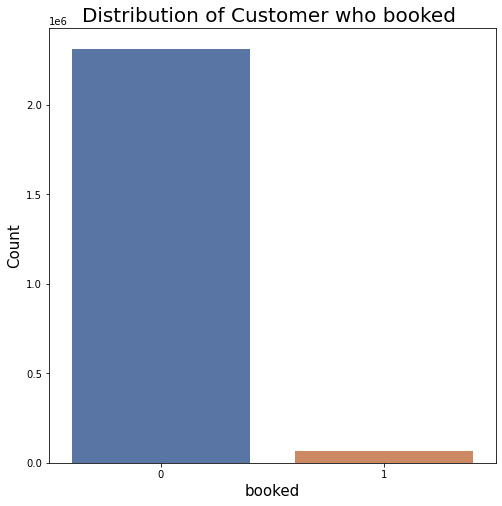

In [17]:
#Data distribution of the booked
plt.figure(figsize=(8,8))
sns.countplot(x = df.booked,palette='deep')
plt.xlabel('booked', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Customer who booked ",fontsize= 20)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca22741be0>,
      dtype=object)

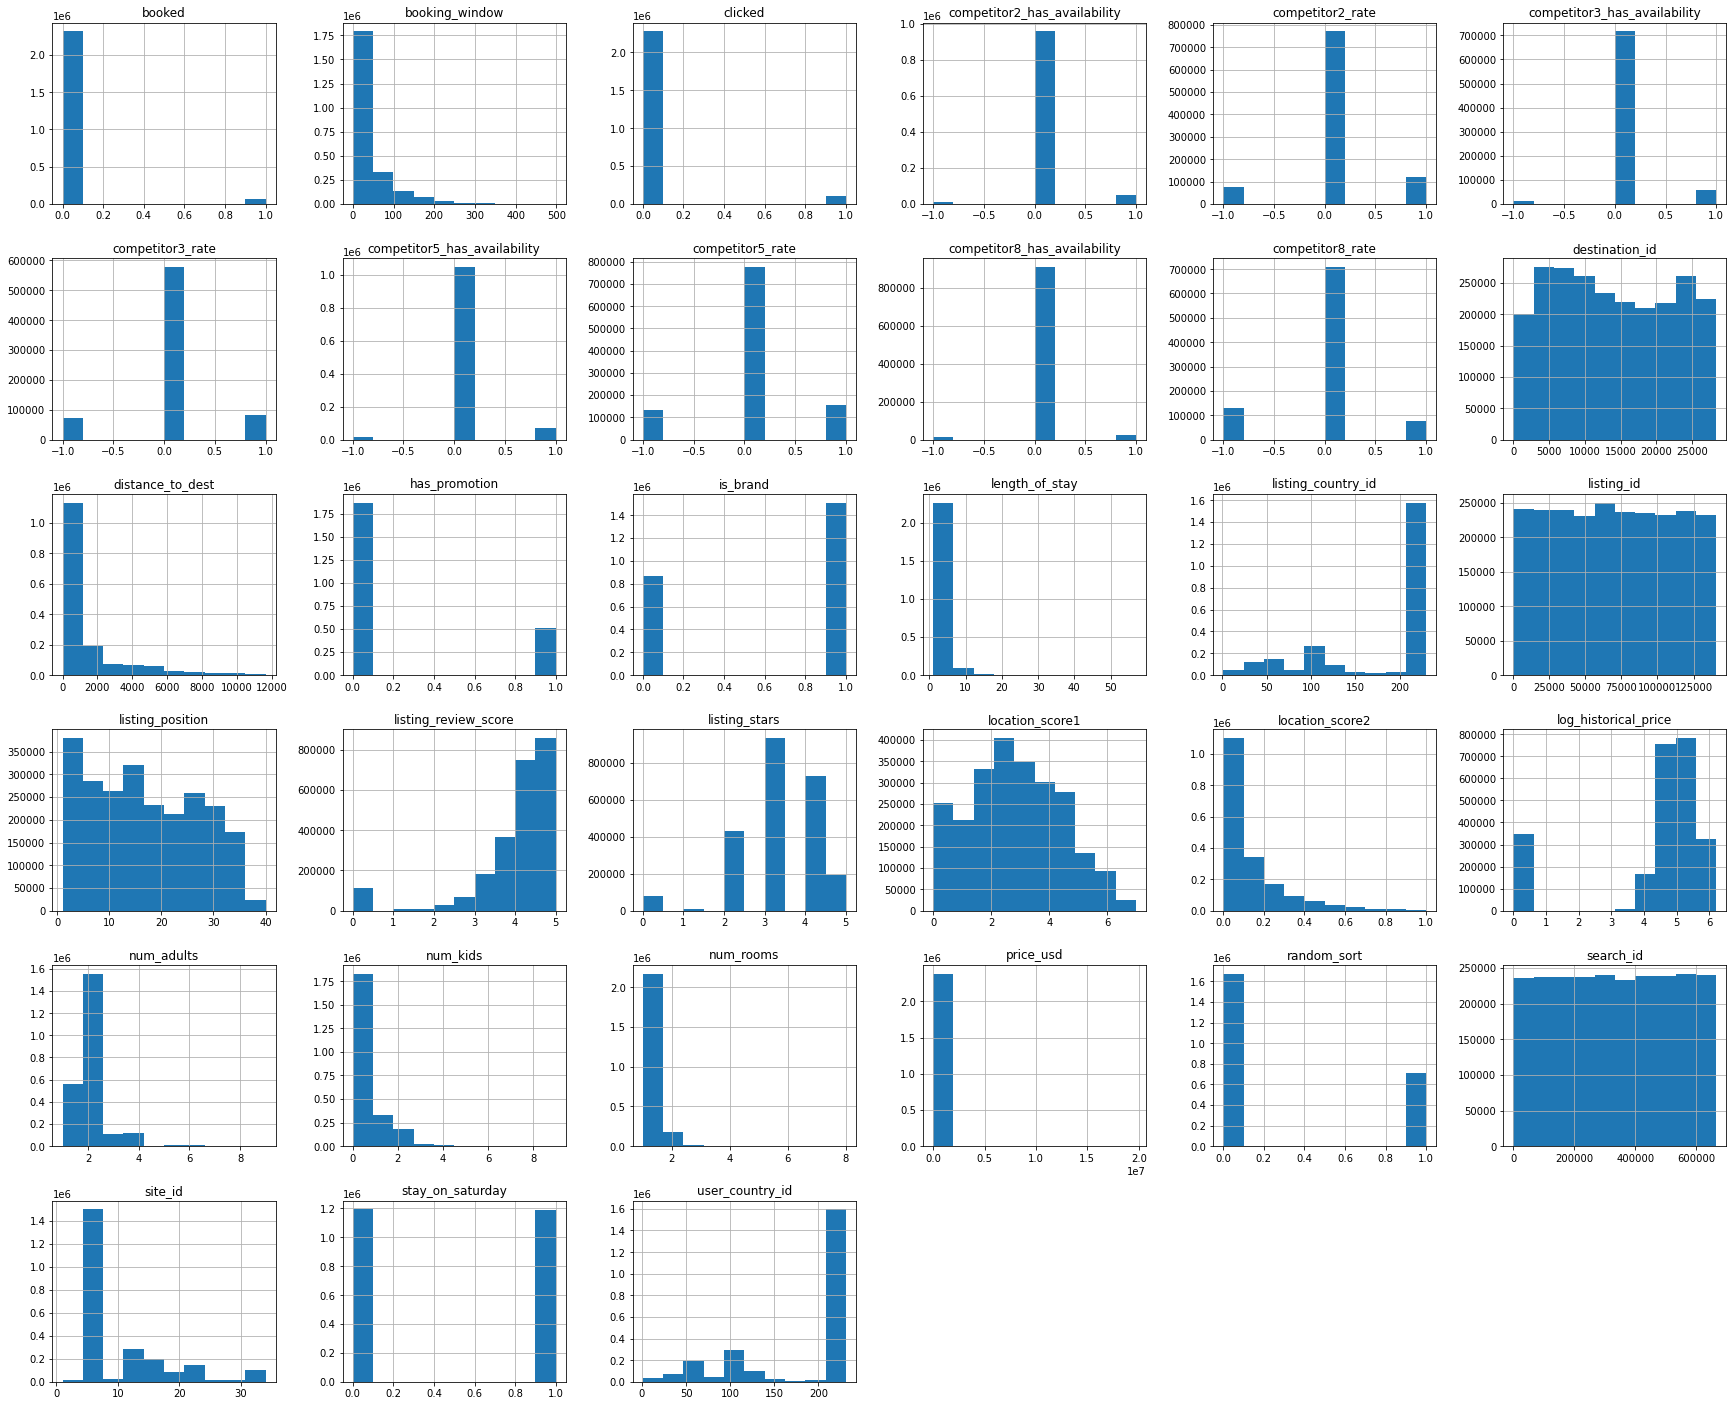

In [18]:
df.hist(figsize=(30,25))

In [19]:
#group wise dtypes:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['search_id', 'site_id', 'user_country_id', 'listing_country_id',
        'listing_id', 'listing_stars', 'is_brand', 'listing_position',
        'has_promotion', 'destination_id', 'length_of_stay', 'booking_window',
        'num_adults', 'num_kids', 'num_rooms', 'stay_on_saturday',
        'random_sort', 'clicked', 'booked'],
       dtype='object'),
 dtype('<M8[ns]'): Index(['timestamp'], dtype='object'),
 dtype('float64'): Index(['listing_review_score', 'location_score1', 'location_score2',
        'log_historical_price', 'price_usd', 'distance_to_dest',
        'competitor2_rate', 'competitor2_has_availability', 'competitor3_rate',
        'competitor3_has_availability', 'competitor5_rate',
        'competitor5_has_availability', 'competitor8_rate',
        'competitor8_has_availability'],
       dtype='object')}

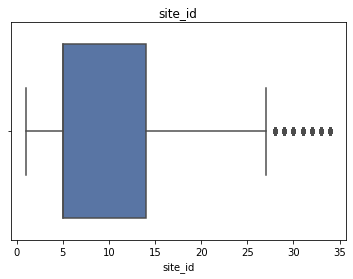

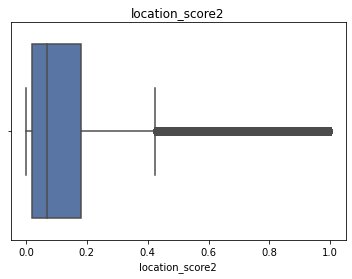

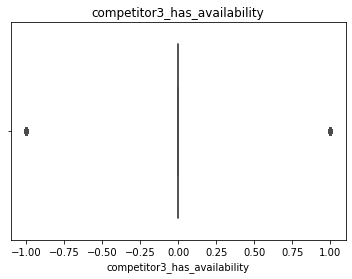

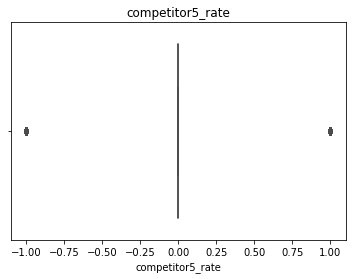

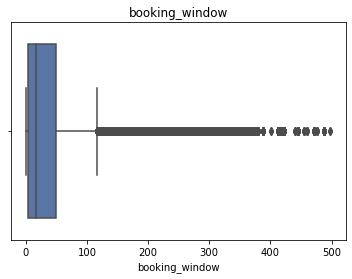

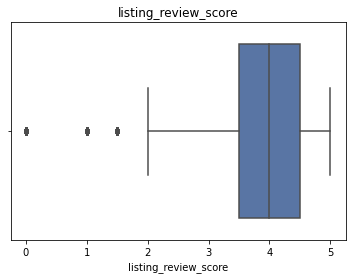

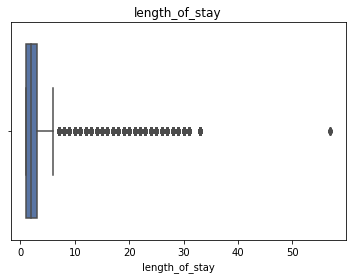

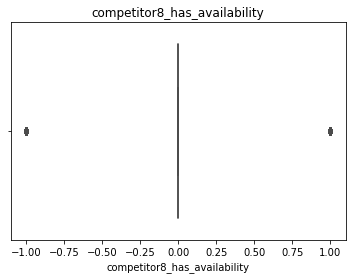

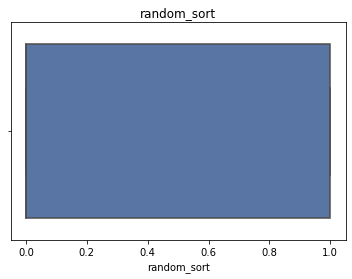

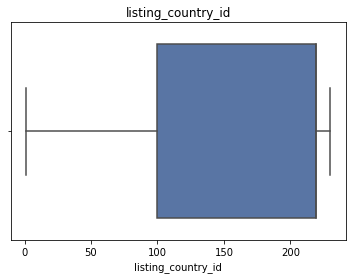

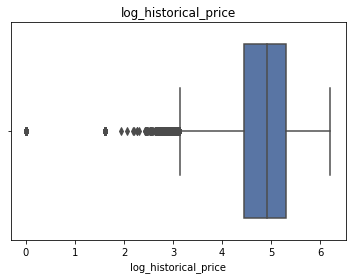

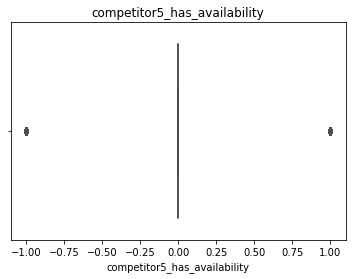

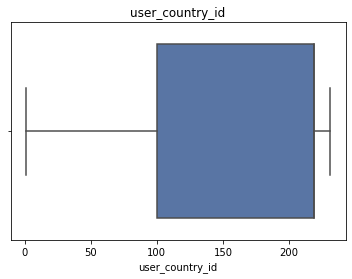

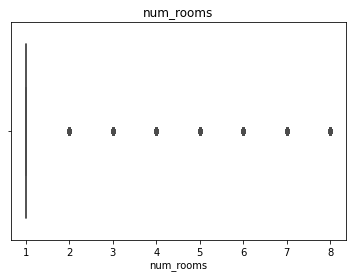

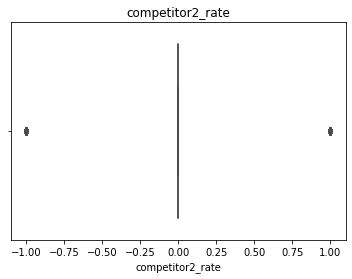

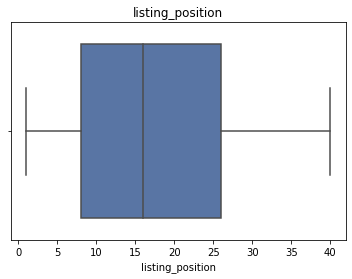

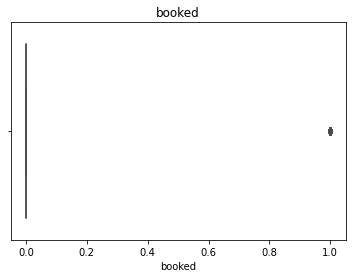

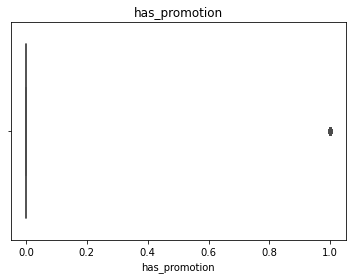

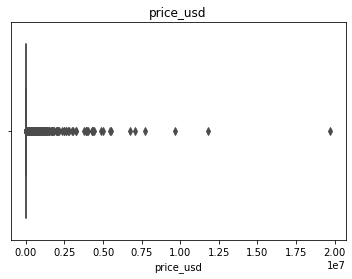

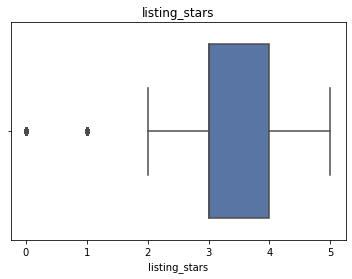

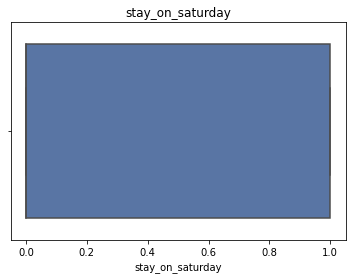

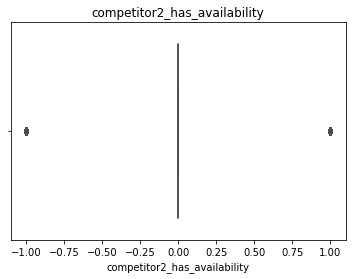

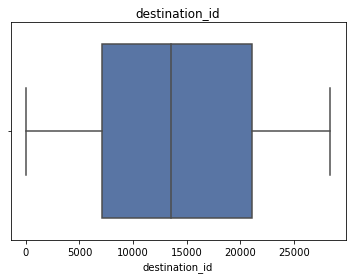

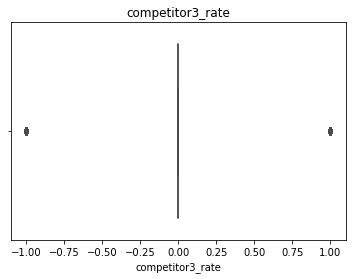

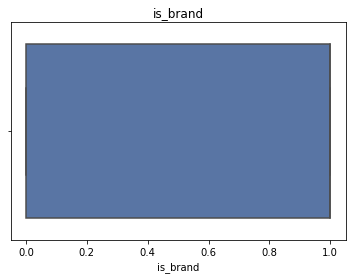

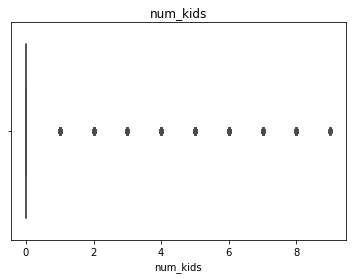

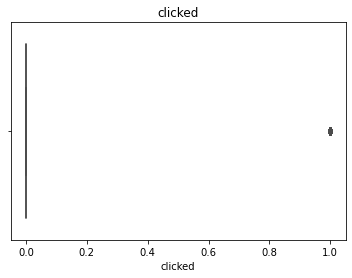

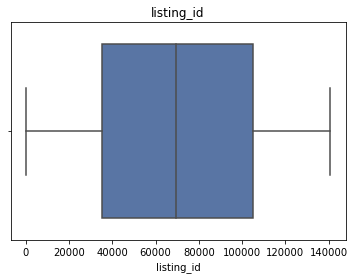

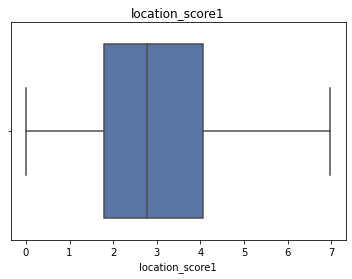

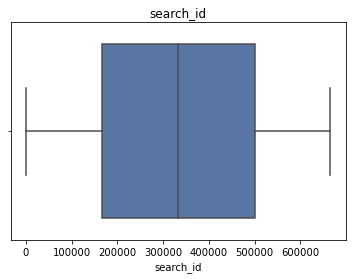

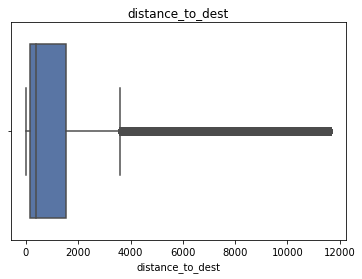

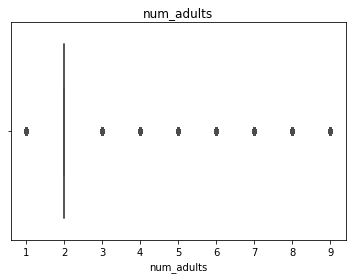

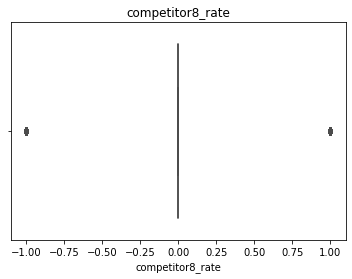

In [20]:
columns={'search_id', 'site_id', 'user_country_id',
       'listing_country_id', 'listing_id', 'listing_stars',
       'listing_review_score', 'is_brand', 'location_score1',
       'location_score2', 'log_historical_price', 'listing_position',
       'price_usd', 'has_promotion', 'destination_id', 'length_of_stay',
       'booking_window', 'num_adults', 'num_kids', 'num_rooms',
       'stay_on_saturday', 'distance_to_dest', 'random_sort',
       'competitor2_rate', 'competitor2_has_availability', 'competitor3_rate',
       'competitor3_has_availability', 'competitor5_rate',
       'competitor5_has_availability', 'competitor8_rate',
       'competitor8_has_availability', 'clicked', 'booked'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

In [21]:
df.isnull().sum()

search_id                             0
timestamp                             0
site_id                               0
user_country_id                       0
listing_country_id                    0
listing_id                            0
listing_stars                         0
listing_review_score               3486
is_brand                              0
location_score1                       0
location_score2                  525992
log_historical_price                  0
listing_position                      0
price_usd                             0
has_promotion                         0
destination_id                        0
length_of_stay                        0
booking_window                        0
num_adults                            0
num_kids                              0
num_rooms                             0
stay_on_saturday                      0
distance_to_dest                 770336
random_sort                           0
competitor2_rate                1414799


In [22]:
df['listing_review_score'].unique()

array([4. , 4.5, 3. , 3.5, 2. , 2.5, 0. , 5. , 1. , 1.5, nan])

In [23]:
df['location_score2'].unique()

array([0.2544,    nan, 0.1924, ..., 0.8679, 0.9196, 0.9873])

In [24]:
df['distance_to_dest'].unique()

array([ 238.35,  238.34,  238.33, ..., 2558.71, 2558.76, 2563.84])

In [25]:
df['competitor2_rate'].unique()

array([nan,  0.,  1., -1.])

In [26]:
df['competitor2_has_availability'].unique()

array([nan,  0.,  1., -1.])

In [27]:
df['competitor8_has_availability'].unique()

array([nan,  0., -1.,  1.])

In [28]:
df.drop("timestamp", axis=1,inplace=True)
df.drop("search_id", axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import OneHotEncoder
one_hot = pd.get_dummies(df)

In [30]:
one_hot

,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,...,competitor2_rate,competitor2_has_availability,competitor3_rate,competitor3_has_availability,competitor5_rate,competitor5_has_availability,competitor8_rate,competitor8_has_availability,clicked,booked
0,5,219,219,3625,4,4.0,0,3.22,0.2544,5.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,5,219,219,11622,4,4.0,0,2.71,NaN,5.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,5,219,219,11826,5,4.5,1,3.22,0.1924,6.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,5,219,219,22824,3,4.0,0,3.26,0.3729,5.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,5,219,219,37581,5,4.5,0,3.09,0.2508,6.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380552,5,219,219,117267,4,4.5,1,2.94,0.1153,5.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2380553,5,219,219,125075,4,4.5,1,3.09,0.0304,6.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2380554,5,219,219,127402,5,4.5,1,2.56,0.0483,6.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2380555,5,219,219,128251,3,4.0,1,3.33,0.0410,5.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [31]:
print(one_hot.max())

site_id                               34.00
user_country_id                      231.00
listing_country_id                   230.00
listing_id                        140821.00
listing_stars                          5.00
listing_review_score                   5.00
is_brand                               1.00
location_score1                        6.98
location_score2                        1.00
log_historical_price                   6.21
listing_position                      40.00
price_usd                       19726328.00
has_promotion                          1.00
destination_id                     28411.00
length_of_stay                        57.00
booking_window                       498.00
num_adults                             9.00
num_kids                               9.00
num_rooms                              8.00
stay_on_saturday                       1.00
distance_to_dest                   11637.79
random_sort                            1.00
competitor2_rate                

In [32]:
print(one_hot.min())

site_id                         1.00
user_country_id                 1.00
listing_country_id              1.00
listing_id                      1.00
listing_stars                   0.00
listing_review_score            0.00
is_brand                        0.00
location_score1                 0.00
location_score2                 0.00
log_historical_price            0.00
listing_position                1.00
price_usd                       0.00
has_promotion                   0.00
destination_id                  2.00
length_of_stay                  1.00
booking_window                  0.00
num_adults                      1.00
num_kids                        0.00
num_rooms                       1.00
stay_on_saturday                0.00
distance_to_dest                0.01
random_sort                     0.00
competitor2_rate               -1.00
competitor2_has_availability   -1.00
competitor3_rate               -1.00
competitor3_has_availability   -1.00
competitor5_rate               -1.00
c

In [33]:
df["listing_review_score"] = df["listing_review_score"].fillna(df["listing_review_score"].dropna().median() )

In [34]:
df["location_score2"] = df["location_score2"].fillna(df["location_score2"].dropna().mean() )

In [35]:
df["distance_to_dest"] = df["distance_to_dest"].fillna(df["distance_to_dest"].dropna().mean() )

In [36]:
df["competitor2_rate"] = df["competitor2_rate"].fillna(df["competitor2_rate"].dropna().mode().values[0] )

In [37]:
df["competitor2_has_availability"] = df["competitor2_has_availability"].fillna(df["competitor2_has_availability"].dropna().mode().values[0] )

In [38]:
df["competitor3_rate"] = df["competitor3_rate"].fillna(df["competitor3_rate"].dropna().mode().values[0] )

In [39]:
df["competitor3_has_availability"] = df["competitor3_has_availability"].fillna(df["competitor3_has_availability"].dropna().mode().values[0] )

In [40]:
df["competitor5_rate"] = df["competitor5_rate"].fillna(df["competitor5_rate"].dropna().mode().values[0] )

In [41]:
df["competitor5_has_availability"] = df["competitor5_has_availability"].fillna(df["competitor5_has_availability"].dropna().mode().values[0] )

In [42]:
df["competitor8_rate"] = df["competitor8_rate"].fillna(df["competitor8_rate"].dropna().mode().values[0] )

In [43]:
df["competitor8_has_availability"] = df["competitor8_has_availability"].fillna(df["competitor8_has_availability"].dropna().mode().values[0] )

In [44]:
df.isnull().sum()

site_id                         0
user_country_id                 0
listing_country_id              0
listing_id                      0
listing_stars                   0
listing_review_score            0
is_brand                        0
location_score1                 0
location_score2                 0
log_historical_price            0
listing_position                0
price_usd                       0
has_promotion                   0
destination_id                  0
length_of_stay                  0
booking_window                  0
num_adults                      0
num_kids                        0
num_rooms                       0
stay_on_saturday                0
distance_to_dest                0
random_sort                     0
competitor2_rate                0
competitor2_has_availability    0
competitor3_rate                0
competitor3_has_availability    0
competitor5_rate                0
competitor5_has_availability    0
competitor8_rate                0
competitor8_ha

In [45]:
print("number of erroneous values in the columns price_usd ===>>", len(df.loc[ (df.price_usd<0) | (df.price_usd > 8000000) ]))

number of erroneous values in the columns price_usd ===>> 3


In [46]:
df.drop(df[df.price_usd > 5000].index, inplace=True)

In [47]:
df

,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,...,competitor2_rate,competitor2_has_availability,competitor3_rate,competitor3_has_availability,competitor5_rate,competitor5_has_availability,competitor8_rate,competitor8_has_availability,clicked,booked
0,5,219,219,3625,4,4.0,0,3.22,0.254400,5.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,5,219,219,11622,4,4.0,0,2.71,0.131032,5.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,5,219,219,11826,5,4.5,1,3.22,0.192400,6.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,5,219,219,22824,3,4.0,0,3.26,0.372900,5.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,5,219,219,37581,5,4.5,0,3.09,0.250800,6.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380552,5,219,219,117267,4,4.5,1,2.94,0.115300,5.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2380553,5,219,219,125075,4,4.5,1,3.09,0.030400,6.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2380554,5,219,219,127402,5,4.5,1,2.56,0.048300,6.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2380555,5,219,219,128251,3,4.0,1,3.33,0.041000,5.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [48]:
df.dtypes

site_id                           int64
user_country_id                   int64
listing_country_id                int64
listing_id                        int64
listing_stars                     int64
listing_review_score            float64
is_brand                          int64
location_score1                 float64
location_score2                 float64
log_historical_price            float64
listing_position                  int64
price_usd                       float64
has_promotion                     int64
destination_id                    int64
length_of_stay                    int64
booking_window                    int64
num_adults                        int64
num_kids                          int64
num_rooms                         int64
stay_on_saturday                  int64
distance_to_dest                float64
random_sort                       int64
competitor2_rate                float64
competitor2_has_availability    float64
competitor3_rate                float64


In [49]:
df.isnull().sum()

site_id                         0
user_country_id                 0
listing_country_id              0
listing_id                      0
listing_stars                   0
listing_review_score            0
is_brand                        0
location_score1                 0
location_score2                 0
log_historical_price            0
listing_position                0
price_usd                       0
has_promotion                   0
destination_id                  0
length_of_stay                  0
booking_window                  0
num_adults                      0
num_kids                        0
num_rooms                       0
stay_on_saturday                0
distance_to_dest                0
random_sort                     0
competitor2_rate                0
competitor2_has_availability    0
competitor3_rate                0
competitor3_has_availability    0
competitor5_rate                0
competitor5_has_availability    0
competitor8_rate                0
competitor8_ha

#### Assigning X AND Y Variables:

In [50]:
x=df.iloc[:,0:31]
x.shape
x

,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,...,random_sort,competitor2_rate,competitor2_has_availability,competitor3_rate,competitor3_has_availability,competitor5_rate,competitor5_has_availability,competitor8_rate,competitor8_has_availability,clicked
0,5,219,219,3625,4,4.0,0,3.22,0.254400,5.98,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5,219,219,11622,4,4.0,0,2.71,0.131032,5.64,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5,219,219,11826,5,4.5,1,3.22,0.192400,6.10,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5,219,219,22824,3,4.0,0,3.26,0.372900,5.74,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5,219,219,37581,5,4.5,0,3.09,0.250800,6.21,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380552,5,219,219,117267,4,4.5,1,2.94,0.115300,5.91,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2380553,5,219,219,125075,4,4.5,1,3.09,0.030400,6.21,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2380554,5,219,219,127402,5,4.5,1,2.56,0.048300,6.21,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2380555,5,219,219,128251,3,4.0,1,3.33,0.041000,5.63,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [51]:
y=df.iloc[:,-1]
y.shape
y

0          0
1          0
2          0
3          0
4          0
          ..
2380552    0
2380553    0
2380554    0
2380555    0
2380556    0
Name: booked, Length: 2379043, dtype: int64

In [52]:
x.fillna(x.mean())

,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,...,random_sort,competitor2_rate,competitor2_has_availability,competitor3_rate,competitor3_has_availability,competitor5_rate,competitor5_has_availability,competitor8_rate,competitor8_has_availability,clicked
0,5,219,219,3625,4,4.0,0,3.22,0.254400,5.98,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5,219,219,11622,4,4.0,0,2.71,0.131032,5.64,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5,219,219,11826,5,4.5,1,3.22,0.192400,6.10,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5,219,219,22824,3,4.0,0,3.26,0.372900,5.74,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5,219,219,37581,5,4.5,0,3.09,0.250800,6.21,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380552,5,219,219,117267,4,4.5,1,2.94,0.115300,5.91,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2380553,5,219,219,125075,4,4.5,1,3.09,0.030400,6.21,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2380554,5,219,219,127402,5,4.5,1,2.56,0.048300,6.21,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2380555,5,219,219,128251,3,4.0,1,3.33,0.041000,5.63,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler ( feature_range=(0,1),copy=True).fit(x)
df1_scaler = scaler.transform(x)
x = pd.DataFrame(df1_scaler)
x.head(10)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.121212,0.947826,0.951965,0.025735,0.8,0.8,0.0,0.461318,0.254400,0.962963,...,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0
1,0.121212,0.947826,0.951965,0.082524,0.8,0.8,0.0,0.388252,0.131032,0.908213,...,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0
2,0.121212,0.947826,0.951965,0.083972,1.0,0.9,1.0,0.461318,0.192400,0.982287,...,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0
3,0.121212,0.947826,0.951965,0.162072,0.6,0.8,0.0,0.467049,0.372900,0.924316,...,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0
4,0.121212,0.947826,0.951965,0.266866,1.0,0.9,0.0,0.442693,0.250800,1.000000,...,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0
5,0.121212,0.947826,0.951965,0.283994,0.8,0.8,1.0,0.442693,0.169200,0.916264,...,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0
6,0.121212,0.947826,0.951965,0.327801,0.8,0.9,0.0,0.467049,0.358200,0.922705,...,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0
7,0.121212,0.947826,0.951965,0.349034,0.8,0.9,1.0,0.442693,0.141700,0.953301,...,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0
8,0.121212,0.947826,0.951965,0.398111,0.8,0.9,0.0,0.467049,0.324600,0.951691,...,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0
9,0.121212,0.947826,0.951965,0.401015,0.8,0.9,1.0,0.157593,0.014900,0.893720,...,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0


In [54]:
x.shape

(2379043, 31)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=52,stratify=y)

In [56]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1903234, 31) (475809, 31)
(1903234,) (475809,)


In [57]:
LOR=LogisticRegression(class_weight="balanced")
GNB=GaussianNB()
DTC=DecisionTreeClassifier(random_state=10)

In [58]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('DecisionTreeClassifier',DTC))

**************** LogisticRegression ****************


LogisticRegression(class_weight='balanced')


ACCURACY SCORE IS =  0.9840923563867013


CROSS_VAL_SCORE =  0.9837960056617788


ROC_AUC_SCORE =  0.9917082024478056


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       1.00      0.98      0.99    462540
           1       0.64      1.00      0.78     13269

    accuracy                           0.98    475809
   macro avg       0.82      0.99      0.88    475809
weighted avg       0.99      0.98      0.99    475809



CONFUSION MATRIX [[454974   7566]
 [     3  13266]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


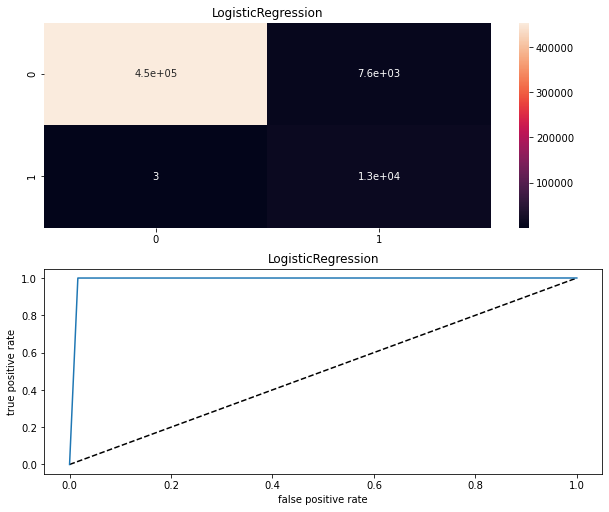




**************** GaussianNB ****************


GaussianNB()


ACCURACY SCORE IS =  0.9837707987869082


CROSS_VAL_SCORE =  0.9833689431924808


ROC_AUC_SCORE =  0.9914696096921636


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       1.00      0.98      0.99    462540
           1       0.63      1.00      0.77     13269

    accuracy                           0.98    475809
   macro avg       0.82      0.99      0.88    475809
weighted avg       0.99      0.98      0.99    475809



CONFUSION MATRIX [[454823   7717]
 [     5  13264]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


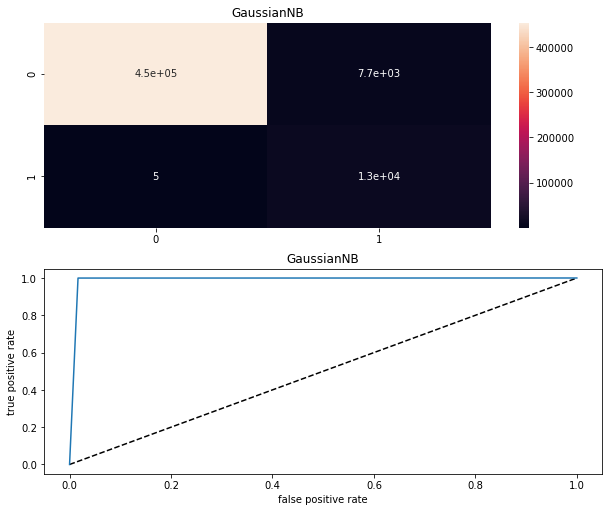




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(random_state=10)


ACCURACY SCORE IS =  0.9898299527751682


CROSS_VAL_SCORE =  0.9895121695740681


ROC_AUC_SCORE =  0.9003023661354387


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.99      1.00      0.99    462540
           1       0.83      0.81      0.82     13269

    accuracy                           0.99    475809
   macro avg       0.91      0.90      0.91    475809
weighted avg       0.99      0.99      0.99    475809



CONFUSION MATRIX [[460282   2258]
 [  2581  10688]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


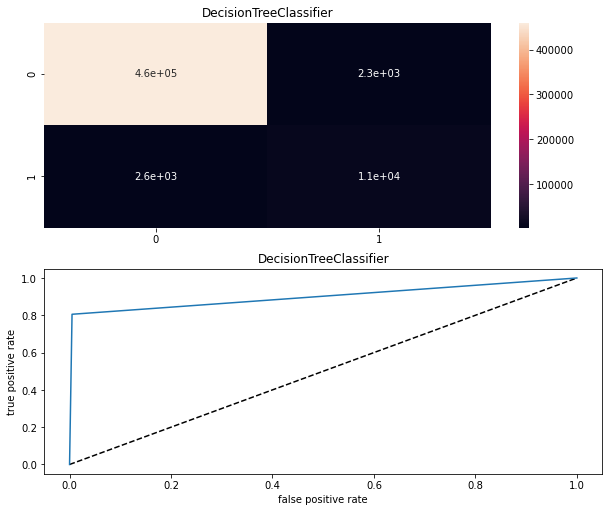

In [59]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

In [60]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,98.409236,98.379601,99.170820
1,GaussianNB,98.377080,98.336894,99.146961
2,DecisionTreeClassifier,98.982995,98.951217,90.030237


In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [62]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
R_forest= RandomForestClassifier(criterion='gini',
n_estimators=100, max_features= 'auto',max_depth=10,random_state=52,class_weight="balanced")
modelR= R_forest.fit(x_train, y_train)

# Predictions
pred_2 = modelR.predict(x_test)

print ("The accuracy of RandomForestClassifier : ",accuracy_score(y_test, pred_2))
print ("The f1 score of RandomForestClassifier : ", f1_score(y_test, pred_2, average = 'binary'))


print(confusion_matrix(y_test,pred_2))
print(classification_report(y_test,pred_2))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_2)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_2)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_2)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_2)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, pred_2)
print('ROC AUC: %f' % auc)

The accuracy of RandomForestClassifier :  0.9846598109745718
The f1 score of RandomForestClassifier :  0.7841490462812362
[[455252   7288]
 [    11  13258]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    462540
           1       0.65      1.00      0.78     13269

    accuracy                           0.98    475809
   macro avg       0.82      0.99      0.89    475809
weighted avg       0.99      0.98      0.99    475809

Accuracy: 0.984660
Precision: 0.645284
Recall: 0.999171
F1 score: 0.784149
ROC AUC: 0.991707


In [63]:
# base estimator = Decision tree Classifier
from sklearn.ensemble import AdaBoostClassifier
ADA=AdaBoostClassifier(n_estimators=500 , learning_rate=1)
ADA.fit(x_train,y_train)
ADA.score(x_train,y_train)
predADA=ADA.predict(x_test)
print(accuracy_score(y_test,predADA))
print(confusion_matrix(y_test,predADA))
print(classification_report(y_test,predADA))
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predADA)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predADA)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predADA)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predADA)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, predADA)
print('ROC AUC: %f' % auc)

0.9940165066234561
[[460460   2080]
 [   767  12502]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    462540
           1       0.86      0.94      0.90     13269

    accuracy                           0.99    475809
   macro avg       0.93      0.97      0.95    475809
weighted avg       0.99      0.99      0.99    475809

Accuracy: 0.994017
Precision: 0.857358
Recall: 0.942196
F1 score: 0.897777
ROC AUC: 0.968850


### Choosing a Model:

Most of the above result shows the accuracy score above 98% where the maximum accuracy score is for Ada boost classifier 99.40% where as other model do performs well but as per the distribution Parameter such as accuracy , precision , recall , f1 score and roc auc curve is all abob=ve mosly 90 % hence it is showing the best opted model for the project.

Ada Boost Classifier=
0.9940165066234561
[[460460   2080]
 [   767  12502]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    462540
           1       0.86      0.94      0.90     13269

    accuracy                           0.99    475809
   macro avg       0.93      0.97      0.95    475809
weighted avg       0.99      0.99      0.99    475809

Accuracy: 0.994017
Precision: 0.857358
Recall: 0.942196
F1 score: 0.897777
ROC AUC: 0.968850



Hence I am choosing ADA to be my best model in order to predict the target variable.

In [64]:
import joblib

In [65]:
joblib.dump(ADA,'OTA Project.obj')

['OTA Project.obj']

In [66]:
#loading back the model:
model=joblib.load('OTA Project.obj')

In [67]:
model

AdaBoostClassifier(learning_rate=1, n_estimators=500)

In [69]:
#Pridicting x_test SVC = svc
ADA.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])